# Lógica Difusa

In [ ]:
!pip install -q scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


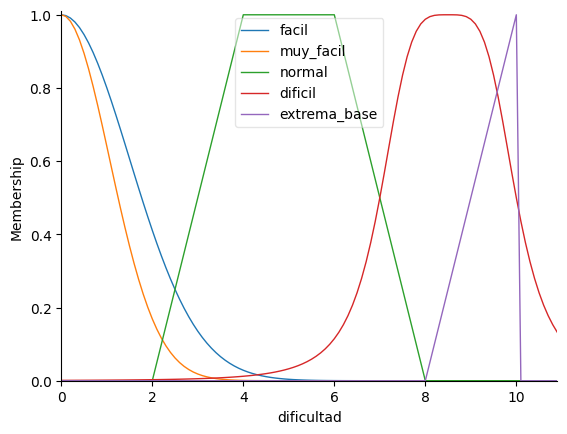

In [ ]:
# -------------------------------------------------------------------------
# SISTEMA DE LÓGICA DIFUSA PARA MAPEAR UN NUEVO JUGADOR DE CYBERPUNK 2077
# -------------------------------------------------------------------------

# --- IMPORTACIÓN DE LIBRERÍAS ---
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# --- FUNCIONES MODIFICADORAS ---
def concentracion(conjunto_fuzzy_term):
    return conjunto_fuzzy_term.mf ** 2

def dilatacion(conjunto_fuzzy_term):
    return conjunto_fuzzy_term.mf ** (1/2)

# --- ANTECEDENTES (Todas las variables de entrada del jugador) ---
# Los universos son 0-10 para la mayoría, 0-100 para puntería.
# mom = más o menos

# 1. Experiencia en Juegos de Acción
exp_accion = ctrl.Antecedent(np.arange(0,11,0.1), 'exp_accion')
exp_accion['poca'] = fuzz.trimf(exp_accion.universe, [0, 0, 2.5])
exp_accion['media'] = fuzz.gaussmf(exp_accion.universe, 5, 1)
exp_accion['mom_media'] = dilatacion(exp_accion.terms['media'])
exp_accion['alta'] = fuzz.trapmf(exp_accion.universe, [6, 8, 10, 10])
exp_accion['muy_alta'] = concentracion(exp_accion.terms['alta'])

# 2. Experiencia en Juegos de Rol
exp_rol = ctrl.Antecedent(np.arange(0,11,0.1), 'exp_accion')
exp_rol['poca'] = fuzz.trimf(exp_rol.universe, [0, 0, 2.5])
exp_rol['media'] = fuzz.gaussmf(exp_rol.universe, 5, 1)
exp_rol['mom_media'] = dilatacion(exp_rol.terms['media'])
exp_rol['alta'] = fuzz.trapmf(exp_rol.universe, [6, 8, 10, 10])
exp_rol['muy_alta'] = concentracion(exp_rol.terms['alta'])

# 3. Puntería en Juegos de Disparos
punteria = ctrl.Antecedent(np.arange(0, 101, 0.1), 'punteria')
punteria['baja'] = fuzz.trimf(punteria.universe, [0, 0, 20])
punteria['muy_baja'] = concentracion(punteria.terms['baja'])
punteria['media'] = fuzz.gaussmf(punteria.universe, 50, 10)
punteria['mom_media'] = dilatacion(punteria.terms['media'])
punteria['alta'] = fuzz.trimf(punteria.universe, [75, 100, 100])
punteria['muy_alta'] = concentracion(punteria.terms['alta'])

# 4. Habilidad en Sigilo
sigilo = ctrl.Antecedent(np.arange(0,11,0.1), 'sigilo')
sigilo['bajo'] = fuzz.zmf(sigilo.universe, 1, 4.5)
sigilo['muy_bajo'] = concentracion(sigilo.terms['bajo'])
sigilo['medio'] = fuzz.trimf(sigilo.universe, [3,5,7])
sigilo['mom_medio'] = dilatacion(sigilo.terms['medio'])
sigilo['alto'] = fuzz.trimf(sigilo.universe, [6,10,10])
sigilo['muy_alto'] = concentracion(sigilo.terms['alto'])

# 5. Agresividad en Juegos
agresividad = ctrl.Antecedent(np.arange(0,11,0.1), 'agresividad')
agresividad['peacemaker'] = fuzz.gaussmf(agresividad.universe, 0, 1.2)
agresividad['normal'] = fuzz.trapmf(agresividad.universe, [2, 4, 6, 8])
agresividad['mom_normal'] = dilatacion(agresividad.terms['normal'])
agresividad['agresivo'] = fuzz.gbellmf(agresividad.universe, 2, 2, 11)
agresividad['berserker'] = concentracion(agresividad.terms['agresivo'])

# 6. Interés en el Hacking
hacking = ctrl.Antecedent(np.arange(0,11,0.1), 'hacking')
hacking['nulo'] = fuzz.trimf(hacking.universe, [0, 0, 3])
hacking['bajo'] = dilatacion(hacking.terms['nulo'])
hacking['inicial'] = fuzz.trimf(hacking.universe, [2,3,5])
hacking['moderado'] = fuzz.trapmf(hacking.universe, [3, 4, 6, 7])
hacking['alto'] = fuzz.gbellmf(hacking.universe, 2, 2, 11)
hacking['fanático'] = concentracion(hacking.terms['alto'])

# 7. Dificultad Preferida
dificultad = ctrl.Antecedent(np.arange(0,11,0.1), 'dificultad')
dificultad['facil'] = fuzz.gaussmf(dificultad.universe, 0, 1.5)
dificultad['muy_facil'] = concentracion(dificultad.terms['facil'])
dificultad['normal'] = fuzz.trapmf(dificultad.universe, [2, 4, 6, 8])
dificultad['dificil'] = fuzz.gbellmf(dificultad.universe, 1.5, 2, 8.5)
dificultad['extrema'] = fuzz.trimf(dificultad.universe, [8, 10, 10])


# --- CONSECUENTES (Afinidad para cada Build) ---
# Universo de afinidad: 0-100 (representando porcentaje de afinidad)
universo_afinidad = np.arange(0, 101, 1)

# 1. Afinidad NetRunner (Hacking)
afin_netrunner = ctrl.Consequent(universo_afinidad, 'afin_netrunner')
afin_netrunner['baja'] = fuzz.trapmf(afin_netrunner.universe, [0, 0, 20, 40])
afin_netrunner['media'] = fuzz.trapmf(afin_netrunner.universe, [30, 50, 70, 90])
afin_netrunner['alta'] = fuzz.trapmf(afin_netrunner.universe, [60, 80, 100, 100])

# 2. Afinidad One Man Army (Tanque/Solo)
afin_onemanarmy = ctrl.Consequent(universo_afinidad, 'afin_onemanarmy')
afin_onemanarmy['baja'] = fuzz.trapmf(afin_onemanarmy.universe, [0, 0, 20, 40])
afin_onemanarmy['media'] = fuzz.trapmf(afin_onemanarmy.universe, [30, 50, 70, 90])
afin_onemanarmy['alta'] = fuzz.trapmf(afin_onemanarmy.universe, [60, 80, 100, 100])

# 3. Afinidad CyberNinja (Cuerpo a cuerpo ágil)
afin_cyberninja = ctrl.Consequent(universo_afinidad, 'afin_cyberninja')
afin_cyberninja['baja'] = fuzz.trapmf(afin_cyberninja.universe, [0, 0, 20, 40])
afin_cyberninja['media'] = fuzz.trapmf(afin_cyberninja.universe, [30, 50, 70, 90])
afin_cyberninja['alta'] = fuzz.trapmf(afin_cyberninja.universe, [60, 80, 100, 100])

# 4. Afinidad Stealth Ghost (Sigilo con armas silenciadas / no letales)
afin_stealthghost = ctrl.Consequent(universo_afinidad, 'afin_stealthghost')
afin_stealthghost['baja'] = fuzz.trapmf(afin_stealthghost.universe, [0, 0, 20, 40])
afin_stealthghost['media'] = fuzz.trapmf(afin_stealthghost.universe, [30, 50, 70, 90])
afin_stealthghost['alta'] = fuzz.trapmf(afin_stealthghost.universe, [60, 80, 100, 100])

# 5. Afinidad Gunslinger Shoota' (Pistolas/Precisión a distancia)
afin_gunslinger = ctrl.Consequent(universo_afinidad, 'afin_gunslinger')
afin_gunslinger['baja'] = fuzz.trapmf(afin_gunslinger.universe, [0, 0, 20, 40])
afin_gunslinger['media'] = fuzz.trapmf(afin_gunslinger.universe, [30, 50, 70, 90])
afin_gunslinger['alta'] = fuzz.trapmf(afin_gunslinger.universe, [60, 80, 100, 100])

# --- VISUALIZACIÓN FUNCIONES DE PERTENENCIA ---
#exp_accion.view()
#exp_rol.view()
#punteria.view()
#sigilo.view()
#agresividad.view()
#hacking.view()
#dificultad.view()

# Ontología

In [1]:
!pip install rdflib
!pip install owlrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.9 MB/s eta 0:00:00


In [2]:
# Importaciones necesarias

from rdflib import Graph, Namespace, RDF, RDFS, Literal, URIRef, XSD
from rdflib.namespace import FOAF, DC

# Crear grafo
g = Graph()

# Namespace base
EX = Namespace("http://example.org/cyberpunk#")
g.bind("ex", EX)
g.bind("foaf", FOAF)
g.bind("dc", DC)

# Clases
g.add((EX.Build, RDF.type, RDFS.Class))
g.add((EX.Habilidade, RDF.type, RDFS.Class))
g.add((EX.Arma, RDF.type, RDFS.Class))
g.add((EX.Implante, RDF.type, RDFS.Class))
g.add((EX.Jugador, RDF.type, RDFS.Class))
g.add((EX.Estadistica, RDF.type, RDFS.Class))
g.add((EX.Habilidad, RDF.type, RDFS.Class))
g.add((EX.EstiloDeJuego, RDF.type, RDFS.Class))
g.add((EX.Afinidad, RDF.type, RDFS.Class))
g.add((EX.Categoria, RDF.type, RDFS.Class))
g.add((EX.Equipo, RDF.type, RDFS.Class))

# Jerarquía de Clases
g.add((EX.ArmaMelee, RDFS.subClassOf, EX.Arma))
g.add((EX.ArmaDistancia, RDFS.subClassOf, EX.Arma))
g.add((EX.ImplanteOfensivo, RDFS.subClassOf, EX.Implante))



<Graph identifier=N42928fe4d7214a7e93c5b39732f2478e (<class 'rdflib.graph.Graph'>)>

# Sistema Experto